/tmp/ipykernel_168384/3208713679.py:11: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  common=xr.open_zarr("common")


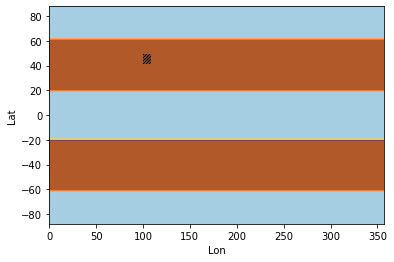

In [1]:
# %matplotlib notebook
import gzip
import pickle
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import os
os.chdir('/home/scratch/Abel_data') 

common=xr.open_zarr("common")
    
lon=common['longitude'].values[:]
lat=common['latitude'].values[:]
Area_type=common['area_type'].values[:]

plt.contourf(lon, lat, Area_type.astype(str)=='land', cmap='Paired')

with gzip.open('obs_mask10', 'rb') as f:
    mask= pickle.load(f)

lon_mask=np.arange(100,110,1)
lat_mask=np.arange(41,50,1)
    
plt.contourf(lon_mask, lat_mask, np.ones((9,10)), hatches=['////////'], alpha=0.2)

plt.ylabel('Lat')
plt.xlabel('Lon')
plt.savefig('/home/data/lab_abel/Paper1/land', bbox_inches='tight',dpi=900)

288.7833717285834 3.573276058831229 -0.343759122327159


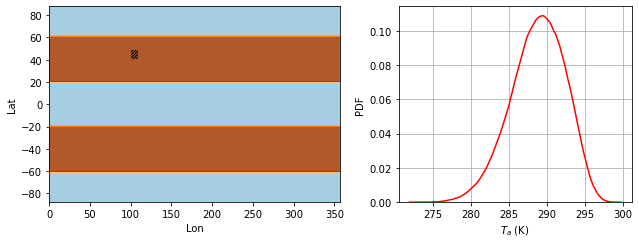

In [2]:
# %matplotlib notebook
import gzip
import pickle
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


# fig, axs = plt.subplots(1, 2, figsize=(9, 3.5))
fig, axs = plt.subplots(1, 2, figsize=(9, 3.5), gridspec_kw={'width_ratios': [1.25, 1]})
# Remove horizontal space between axes

import os
os.chdir('/home/scratch/Abel_data') 

common=xr.open_zarr("common")
    
lon=common['longitude'].values[:]
lat=common['latitude'].values[:]
Area_type=common['area_type'].values[:]

axs[0].contourf(lon, lat, Area_type.astype(str)=='land', cmap='Paired')

with gzip.open('obs_mask10', 'rb') as f:
    mask= pickle.load(f)

lon_mask=np.arange(100,110,1)
lat_mask=np.arange(41,50,1)
    
axs[0].contourf(lon_mask, lat_mask, np.ones((9,10)), hatches=['////////'], alpha=0.2)

axs[0].set(xlabel='Lon',ylabel='Lat')

############################################################################################################


import warnings
warnings.filterwarnings("ignore")
import scipy
import pickle
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics import tsaplots
import gzip
import seaborn

import os
os.chdir('/home/scratch/Abel_data/long_run2')  

with gzip.open('A_comb', 'rb') as f:
    T=pickle.load(f)[:]

seaborn.distplot(ax=axs[1], a=T, kde=True, hist=False, label='long_run', color='red')
print(np.mean(T), np.std(T), scipy.stats.skew(T))

axs[1].set(xlabel='$T_{a}$ (K)',ylabel='PDF')
axs[1].grid()

plt.tight_layout()
plt.savefig('/home/data/lab_abel/Paper1/land', bbox_inches='tight',dpi=900)